In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

84.60157051152589 112.16985323617985
79.87488468734855 -97.45661340598409
-69.40631616664542 -140.80935632770576
17.948753180036476 92.60850277156283
-42.543901307358375 -78.28870646598536
-70.7325327779007 83.0764789518202
36.7144618667421 85.17322181060422
-29.0536420624169 168.24614010514068
-43.259412417427114 64.33812470041215
-38.926611279664385 -70.18079753709058
-87.0413221074724 -53.79569401002455
-49.656946605658106 113.96891682710032
-20.290367873570077 -98.61563223663492
-52.0963699595741 13.719991579280162
43.432569044010165 146.2303006417203
-79.5497758044267 54.700836456705815
0.9622275978175026 98.17205343675778
-10.469092064795603 -81.19910499109875
-10.414140243000972 -119.00684092792196
-88.28650769747586 -54.395720893392664
31.319410136391355 -133.34088122758914
-41.95742027905275 164.11675198477673
25.248039640065002 -160.59811176941687
40.601117534156 18.880748901070092
-34.20795511932333 169.87221373781745
-65.45077233441395 -17.509450574245875
8.355600535899924 

60.23079905601955 61.145794878498606
-29.712788783686932 33.05673833949416
47.106140627320315 96.44182606163332
-64.90328011283981 66.67444004442837
-84.94011019226609 -162.96585698457227
40.19762184899693 80.35580357744686
-20.582629360569868 126.87820991378226
79.57799889088511 125.69054288045061
-85.83746300732376 -158.39551600504936
-72.9529193470338 -44.59466041120422
-75.33702909769714 -0.9294092659989701
-82.63011604378443 25.882647170179155
17.07975453216443 174.5706057958128
28.4468077536351 -22.77355847514636
-23.31075652394462 123.31656218658156
13.196092252069477 50.72102936978018
-47.633072518476965 -172.37209251709228
58.9936943830148 -109.30980850139899
69.99432333068717 65.54555083795748
65.02959014398027 65.74815188996666
-86.07685553101322 18.04895997671474
-64.49658669995713 33.28954204105685
-41.251155406681725 -115.71402506793204
-84.20583295050943 130.3155454352535
-60.62703856574665 88.91812220110342
-10.11384529641353 -126.67415908810578
-11.827153336146026 -136

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
# Import Requests lib and weather_api_key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | akyab
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | villarrica
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | sibolga
Processing Record 18 of Set 1 | chimbote
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | half moon bay
Processing Record 21 of Set 1 | te anau
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | vlore
Processing Re

Processing Record 34 of Set 4 | bilibino
Processing Record 35 of Set 4 | lebu
Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | assiniboia
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | labis
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | saint-augustin
Processing Record 42 of Set 4 | port-cartier
Processing Record 43 of Set 4 | gaya
Processing Record 44 of Set 4 | ilam
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | sobolevo
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | vestmannaeyjar
Processing Record 50 of Set 4 | gornopravdinsk
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | palmer
Processing Record 4 of Set 5 | burnie
Processing Record 5 of Set 5 | mnogovershinnyy
Processing Record 6 of Set 5 | namatanai
Processing Record 7 of Set 

Processing Record 26 of Set 8 | hambantota
Processing Record 27 of Set 8 | port blair
Processing Record 28 of Set 8 | san rafael
Processing Record 29 of Set 8 | atambua
Processing Record 30 of Set 8 | roshchino
Processing Record 31 of Set 8 | ancud
Processing Record 32 of Set 8 | kassala
Processing Record 33 of Set 8 | eldikan
City not found. Skipping...
Processing Record 34 of Set 8 | senanga
Processing Record 35 of Set 8 | pyay
Processing Record 36 of Set 8 | skelleftea
Processing Record 37 of Set 8 | daru
Processing Record 38 of Set 8 | ciledug
City not found. Skipping...
Processing Record 39 of Set 8 | duz
City not found. Skipping...
Processing Record 40 of Set 8 | paranaiba
Processing Record 41 of Set 8 | aripuana
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | nador
Processing Record 44 of Set 8 | zhenjiang
Processing Record 45 of Set 8 | kailua
Processing Record 46 of Set 8 | fukue
Processing Record 47 of Set 8 | kerki
City not found. Skipping...
Proce

Processing Record 13 of Set 12 | lakes entrance
Processing Record 14 of Set 12 | port lincoln
Processing Record 15 of Set 12 | liverpool
Processing Record 16 of Set 12 | rayon
Processing Record 17 of Set 12 | lunenburg
Processing Record 18 of Set 12 | coquimbo
Processing Record 19 of Set 12 | barbar
City not found. Skipping...
Processing Record 20 of Set 12 | isabela
Processing Record 21 of Set 12 | delta del tigre
Processing Record 22 of Set 12 | rio bueno
Processing Record 23 of Set 12 | balkhash
Processing Record 24 of Set 12 | repnoye
Processing Record 25 of Set 12 | kudinovo
Processing Record 26 of Set 12 | rincon
Processing Record 27 of Set 12 | namibe
Processing Record 28 of Set 12 | boras
Processing Record 29 of Set 12 | saint-pierre
Processing Record 30 of Set 12 | vega de alatorre
Processing Record 31 of Set 12 | hanmer springs
Processing Record 32 of Set 12 | kieta
Processing Record 33 of Set 12 | bengkulu
Processing Record 34 of Set 12 | arlit
Processing Record 35 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,24.28,95,100,8.66,RU,2022-05-09 23:09:26
1,Thompson,55.7435,-97.8558,64.09,50,85,1.45,CA,2022-05-09 23:09:26
2,Rikitea,-23.1203,-134.9692,76.14,70,12,9.46,PF,2022-05-09 23:09:27
3,Akyab,20.1500,92.9000,76.98,90,100,7.14,MM,2022-05-09 23:09:27
4,Castro,-24.7911,-50.0119,58.62,86,80,5.03,BR,2022-05-09 23:09:28
5,Busselton,-33.6500,115.3333,55.09,89,15,3.38,AU,2022-05-09 23:09:28
6,Korla,41.7597,86.1469,68.04,33,1,9.64,CN,2022-05-09 23:09:29
7,Vao,-22.6667,167.4833,73.81,70,63,16.11,NC,2022-05-09 23:09:29
8,Saint-Philippe,-21.3585,55.7679,71.19,77,10,6.20,RE,2022-05-09 23:09:30
9,Villarrica,-25.7500,-56.4333,63.50,88,52,4.07,PY,2022-05-09 23:09:30


In [11]:
new_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-09 23:09:26,71.9167,114.0833,24.28,95,100,8.66
1,Thompson,CA,2022-05-09 23:09:26,55.7435,-97.8558,64.09,50,85,1.45
2,Rikitea,PF,2022-05-09 23:09:27,-23.1203,-134.9692,76.14,70,12,9.46
3,Akyab,MM,2022-05-09 23:09:27,20.1500,92.9000,76.98,90,100,7.14
4,Castro,BR,2022-05-09 23:09:28,-24.7911,-50.0119,58.62,86,80,5.03
5,Busselton,AU,2022-05-09 23:09:28,-33.6500,115.3333,55.09,89,15,3.38
6,Korla,CN,2022-05-09 23:09:29,41.7597,86.1469,68.04,33,1,9.64
7,Vao,NC,2022-05-09 23:09:29,-22.6667,167.4833,73.81,70,63,16.11
8,Saint-Philippe,RE,2022-05-09 23:09:30,-21.3585,55.7679,71.19,77,10,6.20
9,Villarrica,PY,2022-05-09 23:09:30,-25.7500,-56.4333,63.50,88,52,4.07


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652297339.790465

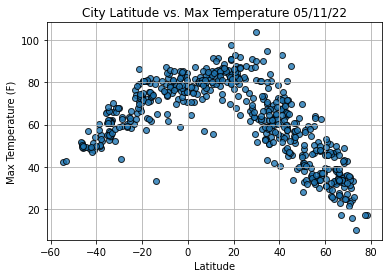

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

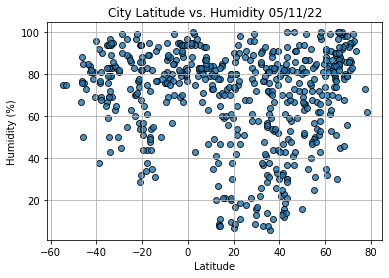

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

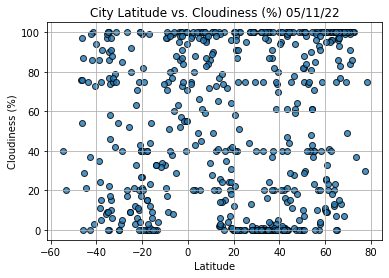

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

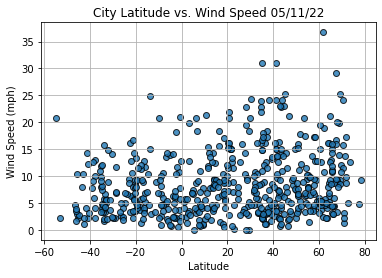

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()